In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from loader import get_dataloader
from train import run
from models import PointNet, PointCNN
from attack import attacktest

In [2]:
b_size=16
num_class = 10 #
name = '{}'.format(num_class)
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
train_loader, test_loader = get_dataloader(1024, b_size, name)

In [3]:
print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())
print(torch.cuda.get_device_name(device))

Available devices  1
Current cuda device  0
GeForce RTX 2080 Ti


Attack

In [4]:
#load pretrained
from train import test

PN = PointNet(num_class)
PN.load_state_dict(torch.load('saves/PointNet.pth'))
PN.eval()

PCNN = PointCNN(num_class)
PCNN.load_state_dict(torch.load('saves/PointCNN.pth'))
PCNN.eval()

#test the loaded model
PN = PN.to(device)
PCNN = PCNN.to(device)
test_acc = test(PN, test_loader, device)
print ("PointNet test acc: {:.04f}".format(test_acc))
test_acc = test(PCNN, test_loader, device)
print ("PointCNN acc: {:.04f}".format(test_acc))

PointNet test acc: 0.9240
PointCNN acc: 0.9383


1) PointNet -> PointNet

Epsilon: 0	Test Accuracy = 842 / 908 = 0.9273127753303965
Epsilon: 0.05	Test Accuracy = 773 / 908 = 0.8513215859030837
Epsilon: 0.1	Test Accuracy = 665 / 908 = 0.7323788546255506
Epsilon: 0.15	Test Accuracy = 528 / 908 = 0.5814977973568282
Epsilon: 0.2	Test Accuracy = 520 / 908 = 0.5726872246696035
Epsilon: 0.25	Test Accuracy = 455 / 908 = 0.501101321585903
Epsilon: 0.3	Test Accuracy = 341 / 908 = 0.3755506607929515


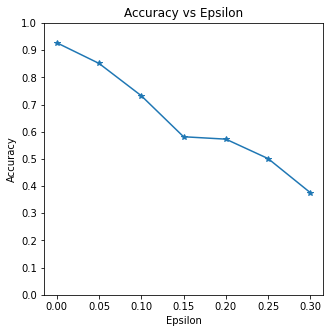

In [5]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PN, PN, device, test_loader, b_size, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

2) PointNet -> PointCNN

Epsilon: 0	Test Accuracy = 844 / 908 = 0.9295154185022027
Epsilon: 0.05	Test Accuracy = 810 / 908 = 0.8920704845814978
Epsilon: 0.1	Test Accuracy = 745 / 908 = 0.8204845814977973
Epsilon: 0.15	Test Accuracy = 636 / 908 = 0.7004405286343612
Epsilon: 0.2	Test Accuracy = 554 / 908 = 0.6101321585903083
Epsilon: 0.25	Test Accuracy = 440 / 908 = 0.4845814977973568
Epsilon: 0.3	Test Accuracy = 364 / 908 = 0.4008810572687225


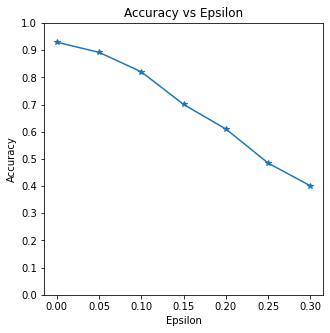

In [6]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PN, PCNN, device, test_loader, b_size, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

3) PointCNN -> PointCNN

Epsilon: 0	Test Accuracy = 848 / 908 = 0.933920704845815
Epsilon: 0.05	Test Accuracy = 786 / 908 = 0.8656387665198237
Epsilon: 0.1	Test Accuracy = 742 / 908 = 0.8171806167400881
Epsilon: 0.15	Test Accuracy = 628 / 908 = 0.6916299559471366
Epsilon: 0.2	Test Accuracy = 520 / 908 = 0.5726872246696035
Epsilon: 0.25	Test Accuracy = 423 / 908 = 0.4658590308370044
Epsilon: 0.3	Test Accuracy = 356 / 908 = 0.3920704845814978


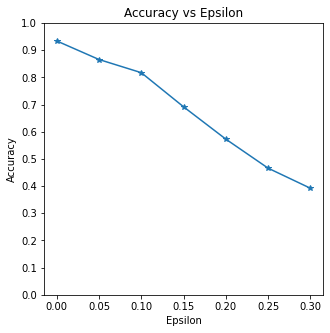

In [7]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PCNN, PCNN, device, test_loader, b_size, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

4) PointCNN -> PointNet

Epsilon: 0	Test Accuracy = 845 / 908 = 0.9306167400881057
Epsilon: 0.05	Test Accuracy = 800 / 908 = 0.8810572687224669
Epsilon: 0.1	Test Accuracy = 706 / 908 = 0.7775330396475771
Epsilon: 0.15	Test Accuracy = 588 / 908 = 0.6475770925110133
Epsilon: 0.2	Test Accuracy = 625 / 908 = 0.6883259911894273
Epsilon: 0.25	Test Accuracy = 566 / 908 = 0.6233480176211453
Epsilon: 0.3	Test Accuracy = 465 / 908 = 0.512114537444934


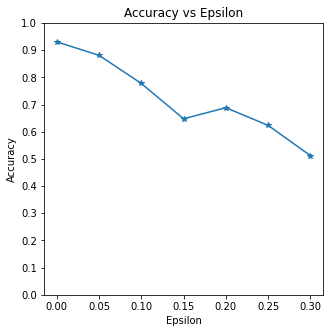

In [9]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]


# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PCNN, PN, device, test_loader, b_size,eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()